In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('/content/Mall_Customers.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

print(data.head(10))
print(" ")
print(data.tail)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72
 
<bound method NDFrame.tail of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21             

In [12]:
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

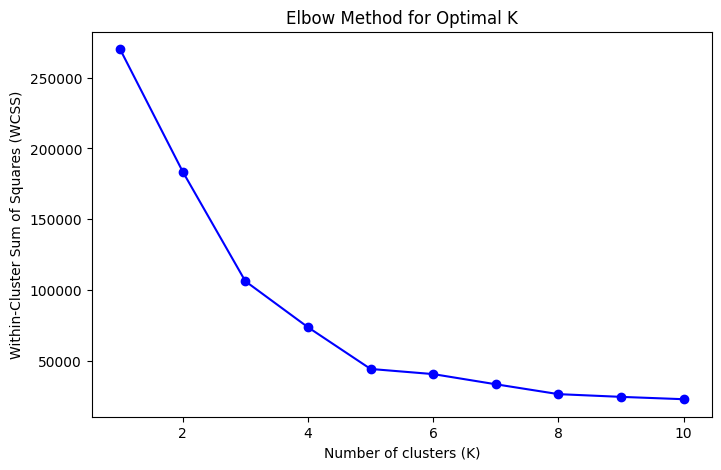

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Adding the cluster information to the original data
data['Cluster'] = clusters

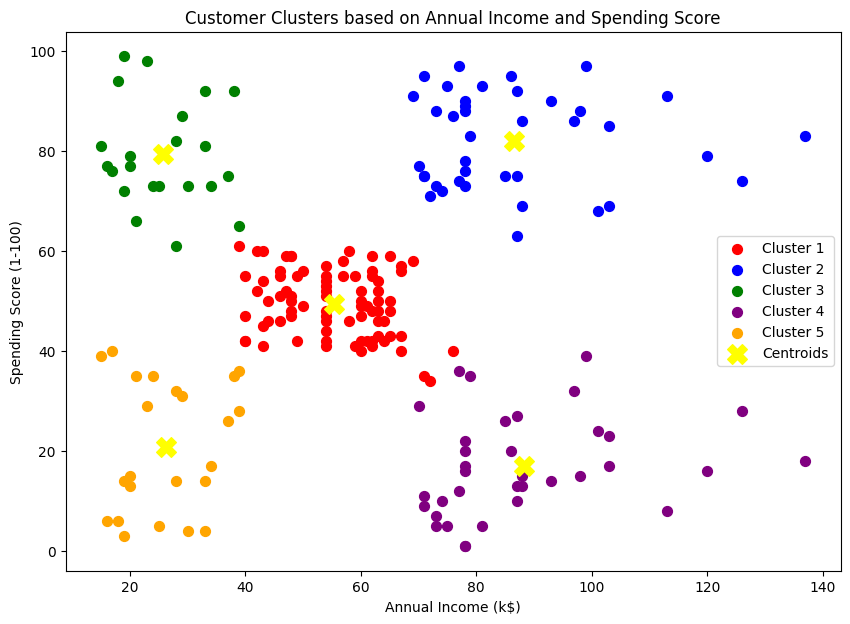

In [15]:
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    plt.scatter(X[clusters == i]['Annual Income (k$)'],
                X[clusters == i]['Spending Score (1-100)'],
                s=50, c=colors[i], label=f'Cluster {i+1}')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', marker='X', label='Centroids')

plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()